#### **Set-up and Creating the Dataset**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [124]:
# creating the dataset
features, targets = make_classification(n_samples=40, n_features=2, n_clusters_per_class= 1, n_redundant=0, n_informative=1, random_state=1)



In [125]:
# Insert the data into dataframe 
df = pd.DataFrame(data=features, columns=['x1', 'x2'])

df['targets'] = targets

# Print the table
df

,x1,x2,targets
0,0.885141,-0.301812,0
1,0.586623,-0.694550,0
2,-0.222328,0.714700,1
3,-0.208894,-0.743572,0
4,1.131629,0.845154,1
5,-1.444114,1.046047,1
6,-0.754398,-1.033574,0
7,-0.352250,-0.801668,0
8,0.300170,-1.253742,0
9,-0.306204,1.115379,1


In [126]:
# Check the shape of the features
features.shape

(40, 2)

In [127]:
# Check the shape of the target
targets.shape

(40,)

In [128]:
# Count the samples of each class 
np.bincount(targets)

array([20, 20])

#### **Plotting the two input features by the target class**

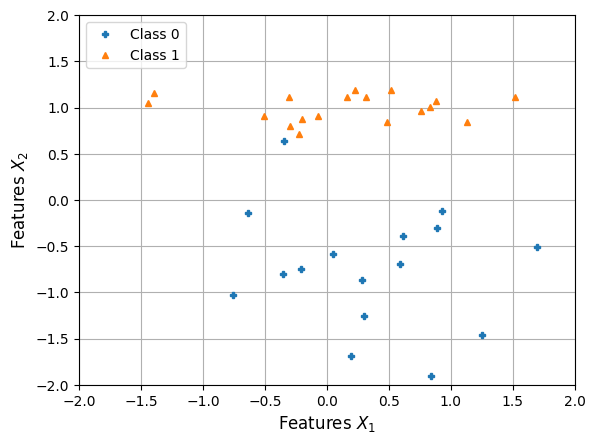

In [129]:
# Plot two input features by the target class
plt.plot(
    features[targets== 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 5,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1,0],
    features[targets == 1,1],
    marker = '^',
    markersize = 5,
    linestyle = '',
    label = 'Class 1'
    )
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Features $X_1$", fontsize = 12)
plt.ylabel("Features $X_2$", fontsize=12)
plt.grid()
plt.show()

#### **Implementing a Perceptron**

In [130]:
# Define the __init__ method (Perceptron object)
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

# Check the weights
ppn = Perceptron(num_features=2)
ppn.weights



[0.0, 0.0]

In [131]:
# Check the bias
ppn.bias

0

#### **Implementing the forward function**

In [132]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0
        return prediction

ppn = Perceptron(num_features=2)
x = [1.51, 2.51]
ppn.forward(x)


0

The prediction in the above case is 0 because the weights and the bias of the perceptron are still 0. It has not learned anything yet.

In [133]:
# Check the parameters after the update rule
print("Model Parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model Parameters:
Weights: [0.0, 0.0]
Bias: 0


#### **Train the Model**

In [134]:
# Train function to automate the training process
def train(model, X_train, y_train, epochs):
    # Trining loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.forward(x)
            error_count += abs(error)
        
        print(f"Epoch {epoch + 1} errors {error_count}")

Let's create a new Perceptron and train it for 5 epochs on our `features` and `targets`.

In [155]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 0
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


#### **Evaluating the model**

We can evaluate the model on the training data by comparing its predictions to the true labels and computing the prediction accuracy.

In [136]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x,y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [137]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model accuracy:", train_acc)

Model accuracy: 0.5


#### **7. Plotting the Decision Boundary**
Finally, we can visualize the perceptron's linear decision boundary. The line that the Perceptron learns is where the weighted_sum_z is exactly 0.

z=(w1⋅x1)+(w2⋅x2)+b=0 

We can solve this for  x2  to get the equation of a line:

x2=−(w1⋅x1) / −bw2 

We can use this equation to plot the line (or "dividing hyperplane") that our model has learned.

In [153]:
def plot_boundary(model):
    w1,w2 = model.weights[0], model.weights[1]
    b = model.bias

    # z = w1*x1 + w2*x2 + b = 0
    # => x2 = (-(w1*x1) -b) / w2

    # To prevent division by zero
    min = 1 / 100000000000

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / (w2 + min)

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / (w2 + min)

    return x1_min, x1_max, x2_min, x2_max

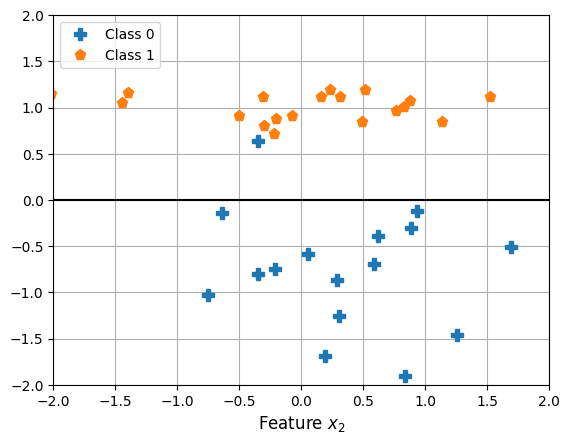

In [154]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="P",
    markersize=8,
    linestyle='',
    label = "Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="p",
    markersize=8,
    linestyle='',
    label = "Class 1",
)

# Plot the decsion boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.xlabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()